# 7th session

# Utility Optimization

## Plotting 3D plots

### meshgrid() function

### - create a matrix

In [31]:
import numpy as np

In [30]:
x = np.arange(0, 5)
x

array([0, 1, 2, 3, 4])

In [26]:
np.random.randint(1, 10, size = (2, 3))

array([[4, 7, 4],
       [3, 7, 4]])

In [27]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

### - create one more matrix

In [14]:
y = np.arange(0, 10)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### - Now let's use meshgrid()

In [32]:
X, Y = np.meshgrid(x, y)

### - See what meshgrid() creates

In [35]:
print(X,Y, sep = "\n")

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


### - x has been repeated as the number of items in y
### - each item of y has been repeated as the number of itmes in x

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

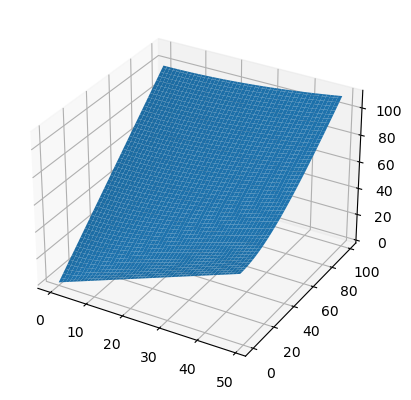

In [70]:
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

x = np.arange(0, 50)
y = np.arange(0, 100)

X, Y = np.meshgrid(x, y)

Z = np.sqrt(X ** 2 + Y ** 2)

ax.plot_surface(X, Y, Z)
plt.show()

### - meshgrid() create a plane of both x and y

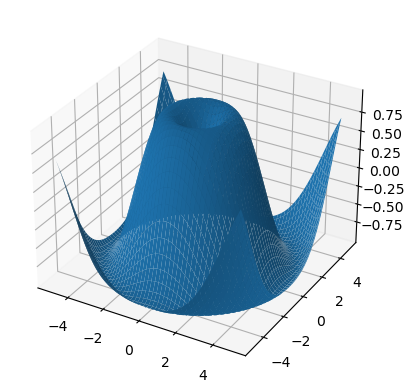

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

X = np.linspace (-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

ax.plot_surface(X, Y, Z)

plt.show()

## The plot has three parts:

- fig = plt.figure()  which creates the chart


- ax = fig.add_subplot(111, projection = '3d') which creates the 3d plot


- ax.plot_surface(X, Y, Z) which prepares variable to be plotted


a breakdown of what 111 means:

The first digit (1) represents the number of rows in the grid.
The second digit (1) represents the number of columns in the grid.
The third digit (1) represents the index of the subplot in the grid.
So, 111 means that you are creating a grid with 1 row and 1 column, and you are placing the subplot in the first (and only) position in that grid. Essentially, it creates a single subplot that takes up the entire figure.

If you had a grid with more subplots, you could use different numbers to specify their positions. For example, fig.add_subplot(221) would create a 2x2 grid and place the subplot in the first position.



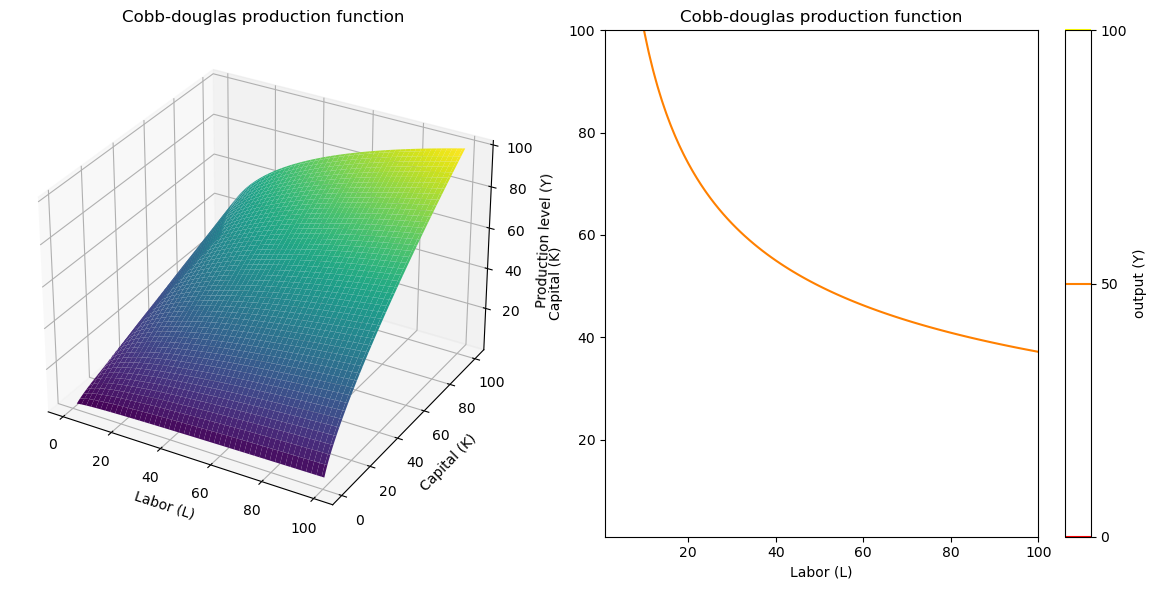

In [69]:
# Cobb-Douglas Production Function Parameters
A = 1
alpha = 0.3
beta = 0.7

#Example data
L = np.linspace(1, 100, 100)
K = np.linspace(1, 100, 100)
L, K = np.meshgrid(L, K)
Y = A * (L ** alpha) * (K ** beta)

#creating the plot
fig = plt.figure(figsize = (12, 6))

#3d surface
ax1 = fig.add_subplot(121, projection = "3d")
ax1.plot_surface(L, K, Y, cmap = 'viridis')
ax1.set_xlabel('Labor (L)')
ax1.set_ylabel('Capital (K)')
ax1.set_zlabel('Production level (Y)')
ax1.set_title('Cobb-douglas production function')

#contour plot for isoquants
ax2 = fig.add_subplot(122)
contour = ax2.contour(L, K, Y, levels = 1,  cmap = 'autumn')
ax2.set_xlabel('Labor (L)')
ax2.set_ylabel('Capital (K)')
ax2.set_title('Cobb-douglas production function')
plt.colorbar(contour, ax = ax2, label = "output (Y)")


plt.tight_layout()
plt.show()

### cmap or color map: https://matplotlib.org/stable/users/explain/colors/colormaps.html

# Problem:
## Maximize the utility function with respect to budget constraint

$$
U = x^{0.6} y^{0.25} \\
I = 680 \\
P_y = 5 \\
P_x = 8 \\
$$

## Two ways to solve

### First Method

$$
\frac{MU_{x}}{MU_{y}} = \frac{P_{x}}{P_{y}}
$$

## Sympy library

In [71]:
import sympy as sp

### - sympy.symbols() or sp.symbols()

- We can define variables in mathematical expressions and equations without assigning them specific numerical values yet.

In [73]:
x, y = sp.symbols('x y') #defining the variables

In [74]:
I = 680 #Income
p_x = 8 #Price of good x
p_y = 5 #price of good y

In [75]:
u = x ** 0.6 * y ** 0.25 #utility function

### - sympy.Eq() or sp.symbols()

- sets up equations

In [89]:
budget_constraint = sp.Eq(p_x * x + p_y * y, I) #comma is acting as =
print(budget_constraint)

Eq(8*x + 5*y, 680)


### - sympy.diff() or sp.diff()

- Computes the derivatives

In [84]:
MU_x = sp.diff(u, x)
MU_y = sp.diff(u, y)

print("Marginal utility of x is ", MU_x, "Marginal utility of y is ", MU_y, sep = "\n")

Marginal utility of x is 
0.6*y**0.25/x**0.4
Marginal utility of y is 
0.25*x**0.6/y**0.75


In [85]:
print("Marginal utility of x is ", MU_x, "Marginal utility of y is ", MU_y, sep = "\t")

Marginal utility of x is 	0.6*y**0.25/x**0.4	Marginal utility of y is 	0.25*x**0.6/y**0.75


In [88]:
# the second equation

optimality_condtion = sp.Eq(MU_x / MU_y, p_x / p_y)
print(optimality_condtion)

Eq(2.4*y**1.0/x**1.0, 1.6)


### - solve()

- The first argument is a tuple containing equations we want to solve.

- The second arguement specifies the variables we want to solve for.

- The solver will find values that satisfy both equations simultaneously.

In [90]:
solution = sp.solve((budget_constraint, optimality_condtion), (x, y))

In [91]:
optimal_x = solution[x]
optimal_y = solution[y]

print(f"Optimal quantity of x: {optimal_x}")
print(f"Optimal quantity of y: {optimal_y}")

Optimal quantity of x: 60.0000000000000
Optimal quantity of y: 40.0000000000000


### Second Method:

- Lagrange Multipliers

$$
U = x^{0.6} y^{0.25} + \lambda (680 - 8x - 5y)
$$

In [98]:
#define varibales

x, y, λ = sp.symbols("x y λ")

#define parameters
I = 680
P_x = 8
P_y = 5

#utility function
U = x ** 0.6 * y **0.25

#budget constraint
budget_constraint = P_x * x + P_y * y - I

#Lagrangian
L = U + λ * budget_constraint

#Partial Derivatives
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dλ = sp.diff(L, λ)

In [99]:
#systems of equations
equations = (sp.Eq(dL_dx, 0), sp.Eq(dL_dy, 0), sp.Eq(dL_dλ, 0))

solution = sp.solve(equations, (x, y, λ))


#conditions for displaying the results

if isinstance(solution, list):
    optimal_x = solution[0][0]
    optimal_y = solution[0][1]
else:
    optimal_x = solution[x]
    optimal_y = solution[y]

print(f"Optimal quantity of x: {optimal_x}")
print(f"Optimal quantity of y: {optimal_y}")

Optimal quantity of x: 60.0000000000000
Optimal quantity of y: 40.0000000000000


## plotting

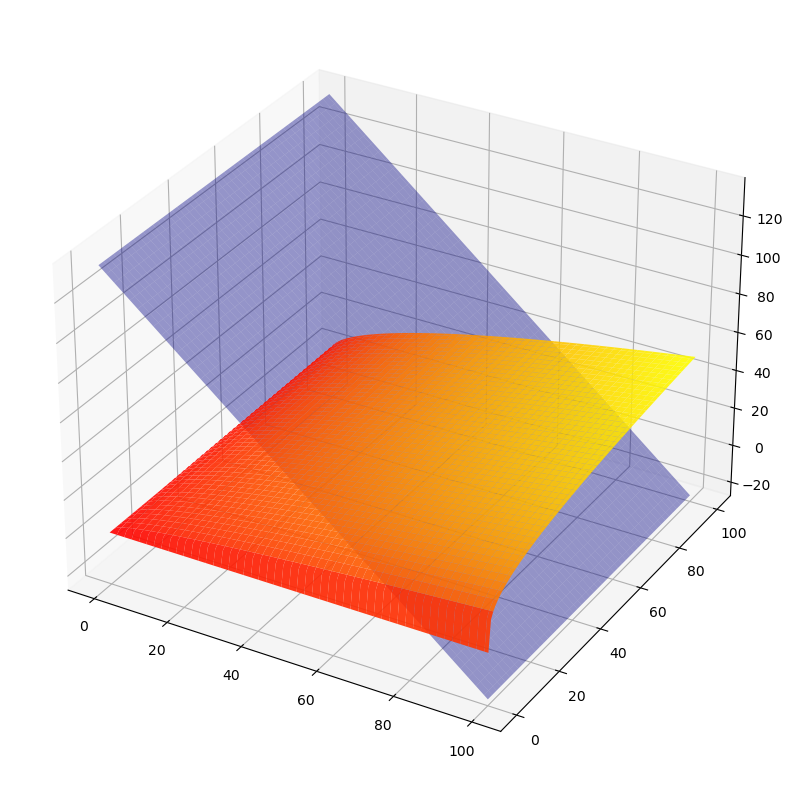

In [122]:
x_vals = np.linspace(0, 100, 100)
y_vals = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U = X ** 0.6 * Y ** 0.25

#creating the plot
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111, projection = '3d')

#utility surface
ax1.plot_surface(X, Y, U, cmap = "autumn", alpha = 0.9)

#plot the budge line
Y_budget = (I - P_x * X) / P_y
ax1.plot_surface(X, Y, Y_budget, color = "blue", alpha = 0.4)


plt.show()

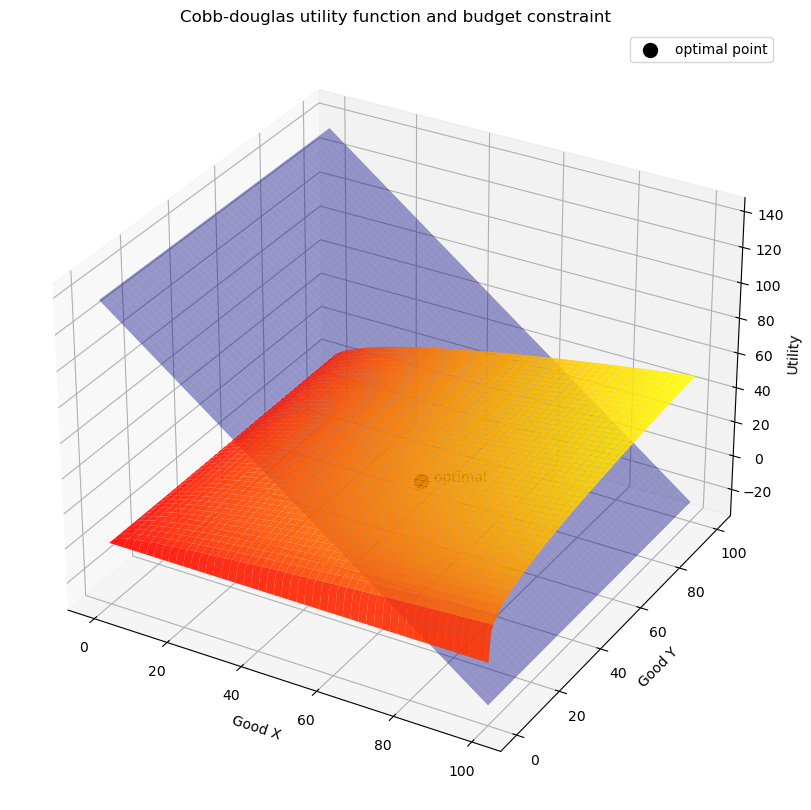

In [121]:
x_vals = np.linspace(0, 100, 100)
y_vals = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U = X ** 0.6 * Y ** 0.25

#creating the plot
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111, projection = '3d')

#utility surface
ax1.plot_surface(X, Y, U, cmap = "autumn", alpha = 0.9)

#plot the budge line
Y_budget = (I - P_x * X) / P_y
ax1.plot_surface(X, Y, Y_budget, color = "blue", alpha = 0.4)

#mark the optimal point
ax1.scatter(optimal_x, optimal_y, optimal_x ** 0.6 * optimal_y ** 0.25, color = "black", label = "optimal point", s = 100)
ax1.text(optimal_x, optimal_y, optimal_x ** 0.6 * optimal_y ** 0.25, '   optimal', color = 'black')

# set labels and title
ax1.set_xlabel('Good X')
ax1.set_ylabel('Good Y')
ax1.set_zlabel("Utility")
ax1.set_title('Cobb-douglas utility function and budget constraint')
ax1.legend()

plt.show()

# Exercises

### 1. define the cobb-douglas production function in the code below, then plot the curves

In [ ]:
# Cobb-Douglas Production Function Parameters
A = 1
alpha = 0.3
beta = 0.7

#Example data
L = np.linspace(1, 100, 100)
K = np.linspace(1, 100, 100)
L, K = np.meshgrid(L, K)
Y = A * (L ** alpha) * (K ** beta)

#creating the plot
fig = plt.figure(figsize = (12, 6))

#3d surface
ax1 = fig.add_subplot(121, projection = "3d")
ax1.plot_surface(L, K, Y, cmap = 'viridis')
ax1.set_xlabel('Labor (L)')
ax1.set_ylabel('Capital (K)')
ax1.set_zlabel('Production level (Y)')
ax1.set_title('Cobb-douglas production function')

#contour plot for isoquants
ax2 = fig.add_subplot(122)
contour = ax2.contour(L, K, Y, levels = 1,  cmap = 'autumn')
ax2.set_xlabel('Labor (L)')
ax2.set_ylabel('Capital (K)')
ax2.set_title('Cobb-douglas production function')
plt.colorbar(contour, ax = ax2, label = "output (Y)")


plt.tight_layout()
plt.show()

## 2. Optimize the following function with respect to the constraint and plot both function and constraint.

$$
z = 4x^{2} - 2xy + 6y^{2} \\
x + y = 72 
$$